In [1]:
#connect to s3 with the sdk
from boto.s3.connection import S3Connection
from PIL import Image 
import webbrowser
import datetime
import boto3
from boto.s3.key import Key

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
client = boto3.client('rekognition', 'us-east-1')
%matplotlib inline

# Set connection with AWS S3
conn = S3Connection()

from matplotlib.pyplot import imshow
import json
from pprint import pprint

%matplotlib inline
import matplotlib
matplotlib.rc("savefig", dpi=100)
import cv2
from collections import namedtuple

print ('done')

done


In [2]:
# Print the bucket name and contents.  These photos were downloaded from the web and https://www.pexels.com/
# and stored into an Amazon Web Services (AWS) Simple Cloud Storage Service (S3) bucket.
mybuckets = conn.get_all_buckets()
print(len(mybuckets))

print ('print info about this bucket')
bucketname='jpopbucketphoto'
s3bucket = conn.get_bucket(bucketname)
print(s3bucket)
size = 0
count = 0
for key in s3bucket.list():
    size += key.size
    count += 1
 
print ("%.3f GB" % (size*1.0/1024/1024/1024))
print ("num files: "+str(count))

for key in s3bucket.list():
        print ("{name}\t{size}\t{modified}".format(
                name = key.name,
                size = key.size,
                modified = key.last_modified,
                ))

4
print info about this bucket
<Bucket: jpopbucketphoto>
0.013 GB
num files: 5
Tom_Cruise.png	58346	2017-09-20T17:28:29.000Z
action-beach-fun-leisure.jpg	3697672	2017-09-17T23:59:39.000Z
kittens-cat-cat-puppy-rush.jpg	1557965	2017-09-18T00:11:30.000Z
low-angle-view-of-woman-relaxing-on-beach-against-blue-sky.jpg	7847821	2017-09-18T00:11:41.000Z
soldier-military-uniform-american.jpg	537657	2017-09-18T00:11:43.000Z


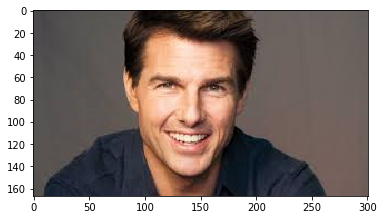

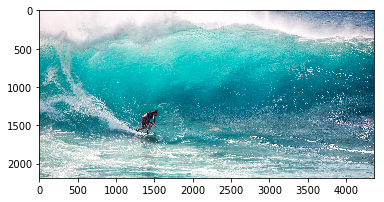

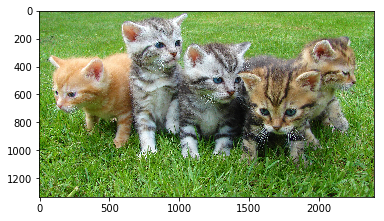

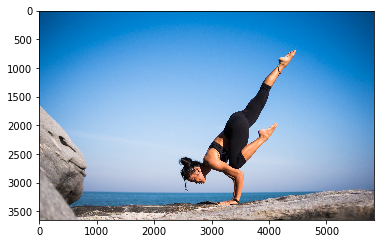

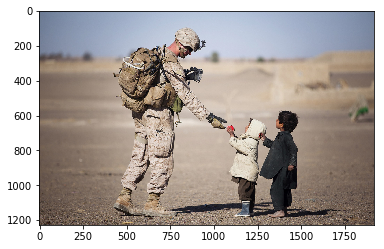

In [3]:
# Present the photos to see how well the recognition API performs

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#retrieve selected images
image1='Tom_Cruise.png'
image2='action-beach-fun-leisure.jpg'
image3='kittens-cat-cat-puppy-rush.jpg'
image4='low-angle-view-of-woman-relaxing-on-beach-against-blue-sky.jpg'
image5='soldier-military-uniform-american.jpg'

key1 = s3bucket.get_key(image1)
key1.get_contents_to_filename(image1) 
pil_im1 = Image.open(image1, 'r')

key2 = s3bucket.get_key(image2)
key2.get_contents_to_filename(image2) 
pil_im2 = Image.open(image2, 'r')

key3 = s3bucket.get_key(image3)
key3.get_contents_to_filename(image3) 
pil_im3 = Image.open(image3, 'r')

key4 = s3bucket.get_key(image4)
key4.get_contents_to_filename(image4) 
pil_im4 = Image.open(image4, 'r')

key5 = s3bucket.get_key(image5)
key5.get_contents_to_filename(image5) 
pil_im5 = Image.open(image5, 'r')


pil_im = [pil_im1, pil_im2, pil_im3, pil_im4, pil_im5]

for ima in pil_im:
    plt.figure()
    plt.imshow(ima)

In [4]:
# Let's observe which labels the recognition api detects
count=0
failcount=0

for key in s3bucket.list():
    #use this line to control how many loops
    if count==50:
        break
    count += 1
    if ((count % 100) == 0):
        print ('at count: '+str(count)+'\n')
        
    print(key.name)
    try:
        
        response = client.detect_labels( 
            Image={
                'S3Object': {
                'Bucket': bucketname,
                'Name': key.name
            }
        }
        )
        
        #Results from the rekognition api
        num_api_labels=len(response['Labels'])
        results=(response['Labels'])
        print('Rekognition labels detected count: '+str(num_api_labels))
        for label in results:
            print "{Name} - {Confidence}%".format(**label)
        print('')
        
    except:
        print ('failed on: '+key.name)
        print('')
        failcount=(failcount+1)
        
print('fail count '+str(failcount))

Tom_Cruise.png
Rekognition labels detected count: 10
People - 99.0660934448%
Person - 99.0661087036%
Human - 99.0371932983%
Man - 72.3345565796%
Face - 54.8026313782%
Selfie - 54.8026313782%
Dimples - 54.0089530945%
Smile - 54.0089530945%
Portrait - 52.0172042847%
Laughing - 51.0624961853%

action-beach-fun-leisure.jpg
Rekognition labels detected count: 7
Sport - 98.3912658691%
Surfboard - 98.3912658691%
Surfing - 98.3912658691%
Outdoors - 93.6582336426%
Sea - 93.6582336426%
Sea Waves - 93.6582336426%
Water - 93.6582336426%

kittens-cat-cat-puppy-rush.jpg
Rekognition labels detected count: 9
Animal - 99.2398071289%
Cat - 99.2398071289%
Kitten - 99.2398071289%
Mammal - 99.2398071289%
Pet - 99.2398071289%
Siamese - 94.5535354614%
Adorable - 85.8706130981%
Manx - 77.2879638672%
Abyssinian - 66.7504043579%

low-angle-view-of-woman-relaxing-on-beach-against-blue-sky.jpg
Rekognition labels detected count: 24
People - 98.994934082%
Person - 98.9949493408%
Human - 98.9568786621%
Dance - 80.665

In [5]:
# Let's detect faces from the photos:

for key in s3bucket.list():
    if count==50:
        break
    count += 1
    if ((count % 100) == 0):
        print ('at count: '+str(count)+'\n')
        
    print(key.name)
    try:
        
        response = client.detect_faces(
            Image={
                'S3Object': {
                'Bucket': bucketname,
                'Name': key.name
            }
        }
        )
        
        #Results from the rekognition api
        num_api_faces=len(response['FaceDetails'])
        print('Rekognition faces detected count: '+str(num_api_faces))        
        print('')
    except:
        print ('failed on: '+key.name)
        print('')
        failcount=(failcount+1)

Tom_Cruise.png
Rekognition faces detected count: 1

action-beach-fun-leisure.jpg
Rekognition faces detected count: 0

kittens-cat-cat-puppy-rush.jpg
Rekognition faces detected count: 0

low-angle-view-of-woman-relaxing-on-beach-against-blue-sky.jpg
Rekognition faces detected count: 0

soldier-military-uniform-american.jpg
Rekognition faces detected count: 0



In [6]:
# Only the Tom Cruise photo was detected as a "face".  Let's see if we can analye the face a little more...

FEATURES_BLACKLIST = ("Landmarks", "Emotions", "AgeRange", "Pose", "Quality", "BoundingBox", "Confidence")

response_face = client.detect_faces(
    Image={
        'S3Object': {
        'Bucket': bucketname,
        'Name': 'Tom_Cruise.png'
        }
    },
    Attributes=[
        'ALL',
    ]
)


results_face=(response_face['FaceDetails'])
#print(results_face)

#for detail in response_face:
    #print "{Name} - {Confidence}%".format(**label)
    
for face in results_face:
    print "Face ({Confidence}%)".format(**face)
    # emotions
    for emotion in face['Emotions']:
        print "  {Type} : {Confidence}%".format(**emotion)
    # quality
    for quality, value in face['Quality'].iteritems():
        print "  {quality} : {value}".format(quality=quality, value=value)
    for age, value in face['AgeRange'].iteritems():
        print "  Age {age} : {value}".format(age=age, value=value)
    # facial features
    for feature, data in face.iteritems():
        if feature not in FEATURES_BLACKLIST:
            print "  {feature}({data[Value]}) : {data[Confidence]}%".format(feature=feature, data=data)


Face (99.99609375%)
  HAPPY : 98.7895202637%
  CONFUSED : 8.52236747742%
  CALM : 1.31872296333%
  Sharpness : 99.9581985474
  Brightness : 40.4568786621
  Age High : 52
  Age Low : 35
  Eyeglasses(False) : 99.9742660522%
  Sunglasses(False) : 99.9095153809%
  Gender(Male) : 99.9281158447%
  EyesOpen(True) : 99.0773468018%
  Smile(True) : 99.7269363403%
  MouthOpen(True) : 77.9510803223%
  Mustache(False) : 93.7784576416%
  Beard(False) : 54.4417304993%


In [7]:
#detect whether Tom Cruise is a celebrity
response_celeb = client.recognize_celebrities(
    Image={
        'S3Object': {
        'Bucket': bucketname,
        'Name': 'Tom_Cruise.png'
        }
    }
)

print ('num celebrities found: '+str(len(response_celeb['CelebrityFaces'])))
for i in response_celeb['CelebrityFaces']:
    print i['Name']
    imageName = i['Name']
name1=response_celeb['CelebrityFaces'][0]['Name']

num celebrities found: 1
Tom Cruise
